In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset,DataLoader

In [2]:
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels.unique()

tensor([0, 1, 2])

In [3]:
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size = .2)


train_dataset = TensorDataset(train_data,train_labels)
test_dataset = TensorDataset(test_data,test_labels)

In [4]:
batchsize = 16
train_loader = DataLoader(train_dataset,batch_size = batchsize,shuffle = True,drop_last = True)
test_loader = DataLoader(test_dataset,batch_size=test_dataset.tensors[0].shape[0])

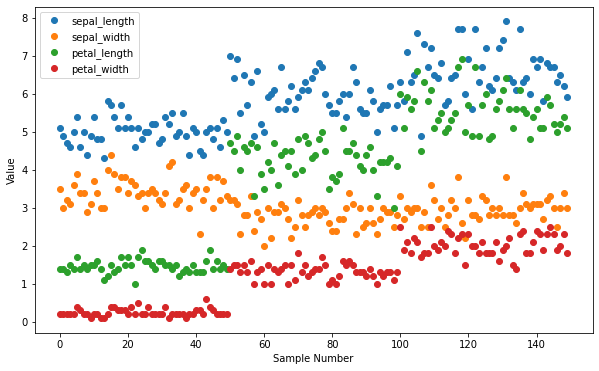

In [5]:
iris.plot(marker='o',linestyle='none',figsize=(10,6))
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

In [6]:
for X,y in train_loader:
  print(X.shape,y.shape)


torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])


In [7]:
def createANewModel():
    
    ANNiris = nn.Sequential(nn.Linear(4,64),
                           nn.ReLU(),
                           nn.Linear(64,64),
                           nn.ReLU(),
                           nn.Linear(64,3))
    
    lossfun = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.SGD(ANNiris.parameters(),lr = .005)
    
    return ANNiris,lossfun,optimizer

In [8]:
numepochs = 2500

def trainTheModel():
    
    trainAcc = []
    testAcc = []
    losses = []
    
    for epochi in range(numepochs):
        
        batchAcc = []
        batchLoss = []
        
        for X,y in train_loader:
            
            yHat = ANNiris(X)
            loss =  lossfun(yHat,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())
            batchLoss.append(loss.item())
            
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))
        
        X,y = next(iter(test_loader))
        predlabels = torch.argmax(ANNiris(X),axis=1)
        testAcc.append(100*torch.mean((predlabels==y).float()).item())
        
    return trainAcc,testAcc,losses

In [9]:
ANNiris,lossfun,optimizer = createANewModel()
trainAcc,testAcc,losses = trainTheModel()

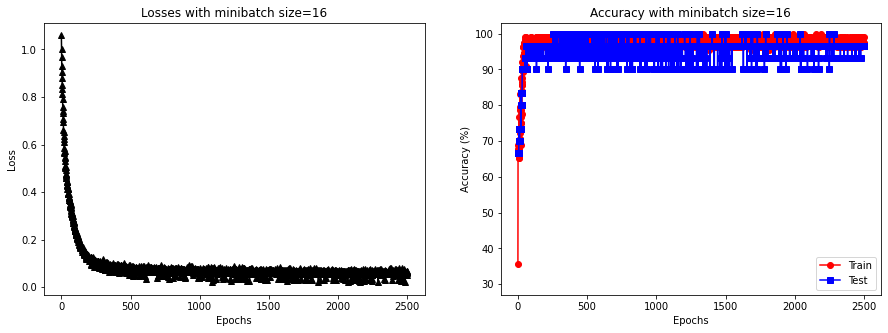

In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,5))


ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses with minibatch size=' + str(batchsize))

ax[1].plot(trainAcc,'ro-')
ax[1].plot(testAcc,'bs-')
ax[1].set_title('Accuracy with minibatch size=' + str(batchsize))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])
ax[1].set_ylim([27,103])

plt.show()